<a href="https://colab.research.google.com/github/engineerchacon/Redes-Neuronales-Profundas/blob/main/Prueba_MLP_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Librerías y funciones a utilizar

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Cargar dataset
data = load_iris()
X = data.data  # características
labels = data.target # etiquetas
y = to_categorical(labels)  # etiquetas codificadas como one-hot

In [3]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalizar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Crear modelo MLP
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()
# Compilar
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar con 20 épocas.
model.fit(X_train, y_train, epochs=20, batch_size=8, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3721 - loss: 1.0170
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4553 - loss: 0.9520 
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5266 - loss: 0.8393 
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6922 - loss: 0.7661 
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.7491 
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7484 - loss: 0.6666 
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7701 - loss: 0.6873 
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7902 - loss: 0.6151 
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8012 - loss: 0.6058 
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7624 - loss: 0.6238 
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7605 - loss: 0.5302 
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [5]:
# Evaluar
loss, acc = model.evaluate(X_test, y_test) # Evaluamos el modelo con
print(f"Exactitud con datos de prueba: {acc*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.6000 - loss: 0.6596
Exactitud con datos de prueba: 60.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


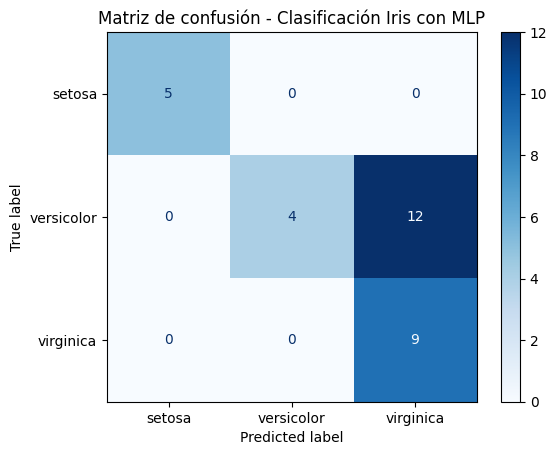

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener predicciones del modelo
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convertir de one-hot a etiqueta
y_true = np.argmax(y_test, axis=1)

# Generar matriz de confusión
cm = confusion_matrix(y_true, y_pred)
labels = data.target_names  # ['setosa', 'versicolor', 'virginica']

# Mostrar matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión - Clasificación Iris con MLP")
plt.show()